# Financial Data
## Part 1

Things to be done:
- Read https://www.degruyter.com/document/doi/10.1515/econ-2022-0073/html?lang=en&srsltid=AfmBOopx0PUyi532zVdGwVIkuRCZqeoEjSpjyeZYmuHhSF0npyPNbkjO
- **Step 3. Replication**
    - Pick one of the funds.
    - Download its data.
    - Pick 1 of the easier metrics (e.g. Correlation, or Dispersion ratio are easier than
    LASSO).
    - Implement the cross-fold validation or k-cross-fold validation.
    - Reproduce the table
    - Reproduce the graphs.

# Picking a fund and downloading the data

In [1]:
import yfinance as yf
import pandas as pd

# Download ECH stock data (or replace with IVV/EQZ)
ticker = "ECH"
ech_data = yf.download(ticker, start="2015-01-01", end="2024-01-01")

# Display the first few rows of data
ech_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ECH,ECH,ECH,ECH,ECH
Date,,,,,
2015-01-02,29.007071,29.360366,28.911385,29.308844,257000
2015-01-05,28.484489,28.948191,28.469768,28.815705,355800
2015-01-06,28.403526,28.712659,28.359363,28.521292,262300
2015-01-07,28.543375,28.727383,28.521295,28.609618,373700
2015-01-08,28.734743,28.852508,28.646417,28.778903,139900


# Calculate an Easy Metric (Correlation)

In [2]:
# Compute correlation matrix
correlation_matrix = ech_data.corr()

# Display correlation matrix
print(correlation_matrix)


Price             Close      High       Low      Open    Volume
Ticker              ECH       ECH       ECH       ECH       ECH
Price  Ticker                                                  
Close  ECH     1.000000  0.999222  0.999324  0.998301 -0.133841
High   ECH     0.999222  1.000000  0.999113  0.999294 -0.127609
Low    ECH     0.999324  0.999113  1.000000  0.999168 -0.140644
Open   ECH     0.998301  0.999294  0.999168  1.000000 -0.134156
Volume ECH    -0.133841 -0.127609 -0.140644 -0.134156  1.000000


# Implement K-Fold Cross-Validation

In [3]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare Data (Using Closing Prices)
ech_data['Next_Close'] = ech_data['Close'].shift(-1)  # Target Variable
ech_data.dropna(inplace=True)  # Drop missing values

# Define features and target variable
X = ech_data[['Open', 'High', 'Low', 'Volume']]  # Features
y = ech_data['Next_Close']  # Target

# Initialize K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Perform Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # R^2 as scoring metric
print("Cross-Validation R^2 Scores:", cv_scores)
print("Average R^2 Score:", np.mean(cv_scores))


Cross-Validation R^2 Scores: [0.99341422 0.99374784 0.99289381 0.99418722 0.99360407]
Average R^2 Score: 0.9935694317250183


# Reproduce the Table

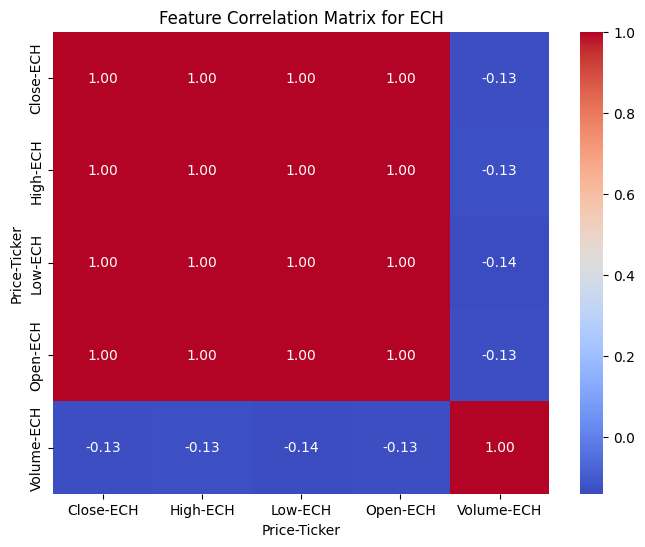

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix for ECH")
plt.show()
